In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()
dataset = shuffle(pd.read_csv("/content/data_banknote_authentication.txt"))

...............Reading the Dataset  and Dataset Pre-Processing ................


In [3]:
dataset.columns = ["Variance of Wavelet Transformed image", "Skewness of Wavelet Transformed image",
                "Curtosis of Wavelet Transformed image", "Entropy of image","Class"]

In [4]:
# Changing the values of the class to -1 and 1 for tanh activation function
dataset.loc[dataset['Class'] == 1, 'Class'] = -1
dataset.loc[dataset['Class'] == 0, 'Class'] = 1

In [5]:
x = dataset[["Variance of Wavelet Transformed image","Skewness of Wavelet Transformed image","Curtosis of Wavelet Transformed image","Entropy of image"]]
y = dataset[['Class']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)
print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)

Shape of X_Train :  (1096, 4)
Shape of Train class :  (1096, 1)
Shape of X_test :  (275, 4)
Shape of Test class :  (275, 1)


In [7]:
# Normalizing data using Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

In [8]:
# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [9]:
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)

Time Cost for Pre-processing and Reading the Dataset: 0.134990 seconds 
 


In [10]:
# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [11]:
# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

In [12]:
print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
np.random.seed(10)
inp = 4
hd = 6
out = 1

............... Initializing hyperparameters ................


In [13]:
actual_out_size = y_train.size
epochs = 10000
eta = 0.001
alpha = 0.7

In [14]:
print("............... Setting 4 weights for hidden layers ................")
# Setting random weights for 4 hidden layers
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)

............... Setting 4 weights for hidden layers ................


In [15]:
acc_list = []

In [16]:
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

Time Cost for Setting HyperParameters: 0.039104 seconds 
 


In [17]:
print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for i in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    # Calculate accuracy
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_sigmoid_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)


    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_sigmoid_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

............... Training Backpropagation Algorithm ................


In [18]:
print("Training Accuracy: "+str(round(acc_list[-1],2) * 100) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

Training Accuracy: 94.0 %
Time Cost for Training algorithm: 47.894320 seconds 
 


In [19]:
print("............... Plotting Accuracy Curve ................")

............... Plotting Accuracy Curve ................


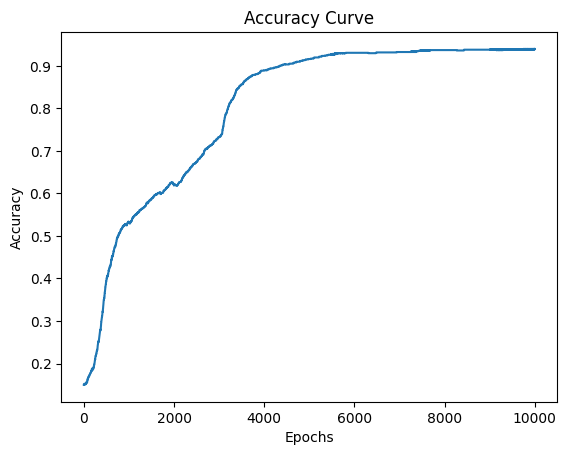

In [20]:
plt.title("Accuracy Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(acc_list)
plt.show()

In [21]:
print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()


............... Testing Backpropagation Algorithm ................


In [22]:
# Feedforward for 4 hidden layers by calling activation function
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

In [23]:
l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

In [24]:
l3_test = np.dot(l2_out_test, w3_l3)
l3_out = hyperbolic_tanh(l3_test)

In [25]:
l4_test = np.dot(l3_out, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

In [26]:
output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)

In [27]:
# Calculate accuracy
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc/ actual_out_size) * 100

In [28]:
print("Testing Accuracy: "+str(round(acc_test,2)) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

Testing Accuracy: 94.18 %
Time Cost for Testing algorithm: 0.087031 seconds 
 


In [29]:
print(final_out_test)

[[ 0.92665492]
 [ 0.92422074]
 [ 0.88921246]
 [-0.92586363]
 [-0.9211158 ]
 [ 0.60660787]
 [-0.52622284]
 [-0.93981348]
 [ 0.11824445]
 [-0.9265875 ]
 [ 0.903083  ]
 [-0.92254446]
 [ 0.94280737]
 [-0.92364946]
 [ 0.41006513]
 [ 0.92770346]
 [ 0.68675387]
 [-0.91764896]
 [-0.65931189]
 [ 0.58222278]
 [ 0.9252251 ]
 [-0.66105356]
 [ 0.92893954]
 [-0.88980118]
 [-0.4900394 ]
 [ 0.61395999]
 [ 0.48325581]
 [-0.91934342]
 [ 0.90905471]
 [-0.89757498]
 [-0.94440517]
 [-0.92518819]
 [ 0.9222311 ]
 [-0.70554877]
 [ 0.89270971]
 [-0.7175564 ]
 [ 0.5760459 ]
 [ 0.92905442]
 [-0.92255545]
 [ 0.9213555 ]
 [-0.65220387]
 [ 0.92822917]
 [ 0.60872709]
 [-0.65511832]
 [-0.9212    ]
 [-0.92620968]
 [-0.92673941]
 [-0.88433494]
 [ 0.5944976 ]
 [ 0.92031923]
 [ 0.92492573]
 [-0.8065215 ]
 [-0.72594999]
 [ 0.91978556]
 [-0.65873193]
 [-0.92282085]
 [ 0.93252371]
 [ 0.92203358]
 [ 0.91653182]
 [-0.92207065]
 [ 0.92723374]
 [-0.89378306]
 [-0.71879208]
 [-0.92698367]
 [ 0.92477767]
 [-0.91482173]
 [-0.91282